<h1> Códigos de Huffman </h1> 

## Introducción al problema
<p> 
    El problema es una pregunta básica en el área de la compresión de datos. 
Dado que las computadoras operan sobre secuencias de bits, tenemos que codificar los símbolos del alfabeto a estas secuencias. La forma más simple es usando un número fijo de bits,sin embargo esto es un desperdicio. Para ver por qué toma en cuenta lo siguiente: 
</p> 
<p> 
    Las siguientes son dos codificaciones del alfabeto ${a,b,c,d}$. La primera es una codificación de longitud fija y la segunda de longitud variable. 
</p> 
<p> Codificación 1 </p> 
\begin{equation}
\begin{split}
     \gamma_1(a)  & = 00 \\ 
     \gamma_1(b) & = 01 \\ 
     \gamma_1(c) & = 10 \\ 
     \gamma_1(d) & = 11 
\end{split}
\end{equation}
<p> Codificación 2</p> 
\begin{equation}
\begin{split}
     \gamma_2(a)  & = 1 \\ 
     \gamma_2(b) & = 001 \\ 
     \gamma_2(c) & = 000 \\ 
     \gamma_2(d) & = 01 
\end{split}
\end{equation}
<p> Ahora si $s = aaabcda$ la codificación de $s$ usando $\gamma_1$ es $\gamma_1(s) = 00000001101100$. En cambio al utilizar $\gamma_2$ tenemos $\gamma_2(s) = 111001000011$. De modo que la longitud de la segunda codificación es menor y por lo tanto mejor.</p> 
<p>
Que la segunda codificación del ejemplo anterior fuese mejor, no fue una casualidad. Resultó mejor ya que la letra $a$ que tenía más frecuencia en $s$ fue asignada a una secuencia de bits más corta. Veremos que lo más óptimo es asignar secuencias de bits más cortas a letras menos frecuentes. Con esto, reducimos la longitud de la códificación de las cadenas en promedio. La pregunta es: ¿Cómo hacemos esta asignación?. 
</p>




## Códigos prefijos
<p> 
Una codificación puede ser ambigua si una secuencia de bits es resultado de dos cadenas distinas. Tomemos la siguiente codificación de ejemplo:
</p> 
 \begin{equation}
\begin{split}
     \gamma(a)  & = 1 \\ 
     \gamma(b) & = 001 \\ 
     \gamma(c) & = 00 \\ 
\end{split}
\end{equation}
Para este código la cadena $s = 001$ es la codificación de dos distintas cadenas $b$ y $ca$. 
<p> 
Para que tal ambiguedad no exista, definimos los codigos prefijos como sigue: <br> 
Un codigo prefijo para un conjunto de letras $S$ es una función $\gamma$ que mapea cada letra $x \in S$ a alguna 
secuencia de 0's y 1's de tal manera que para distintos $x,y \in S$, $\gamma(x)$ no es prefijo de la secuencia $\gamma(y).$
</p> 
Por ejemplo, el siguiente es un código prefijo: 
\begin{equation}
\begin{split}
     \gamma(a)  & = 11 \\ 
     \gamma(b) & = 01 \\ 
     \gamma(c) & = 001 \\
     \gamma(d) & = 10 \\
     \gamma(e) & = 000 \\     
\end{split}
\end{equation}

## Codigos prefijo optimos 
Ahora, queremos tomar ventaja de la frecuencia de las letras para reducir el número de bits por letra en promedio. Supongamos que $n$ es el número de letras en total. Sea $f_x$ la frecuencia de la letra $x$. Entonces $nf_x$ es el número de veces que aparece $x$ en el texto. Ahora la longitud del texto se puede expresar de la siguiente forma: 

$$ \sum_{x \in S} n f_x |\gamma(x)|  = n \sum_{x \in S}f_x $$ 
Eliminando el coeficiente $n$ tenemos 
$$ \sum_{x \in S} f_x|\gamma(x)|$$
que es el número de bits en promedio por letra. Denotamos a esta cantidad como $ABL(\gamma)$
<p> 
Veamos un ejemplo, supongamo que tenemos el alfabeto $S = \{a,b,c,d,e\}$, con el texto $aaabbbceeed$. Las 
frecuencias de las letras son: 
\begin{equation}
\begin{split}
     f_a & = \frac{3}{11} = 0.272 \\ 
     f_b & = \frac{3}{11} = 0.272 \\ 
     f_c & = \frac{1}{11} = 0.090 \\
     f_d & = \frac{3}{11} = 0.272 \\
     f_e & = \frac{1}{11} = 0.090\\     
\end{split}
\end{equation}
 </p> 
<p> 
Tomemos el código del párrafo anterior, tenemos que el número de bits por letra en promedio es 
\begin{equation}
\begin{split}
& f_a|\gamma(a)| + f_b|\gamma(b)| + f_c|\gamma(c)| + f_d|\gamma(d) + |f_e|\gamma(e)| =  \\ 
& 0.272\times 2 + 0.272\times2 + 0.090\times3 + 0.272\times2 + 0.090\times3 = 2.172
\end{split}
\end{equation}
</p> 
<p> 
    Comparemos con un código de longitud fija. El número de bits en promedio por palabra de un código de longitud fija 3 es 3. Así, el código anterior es mejor. De aquí, podemos reformular el problema inicial, encontrar el código $\gamma$ que mínimice la cantidad $ABL(\gamma)$ para todo código posible.  
</p> 

## Diseñando el algoritmo 
<p> 
    Un código prefijo puede ser descrito con un árbol binario. Supongamos que tenemos un árbol binario en el cual cada una de las hojas esta marcada con una letra distinta del alfabeto. La códificación de la letra $x$ se obtiene con el camino de la raíz a la hoja marcada con la letra $x$ de la siguiente manera: Cada vez que se tome una arista, si tal arista va hacia un hijo izquierdo escribimos un 0. Si va hacia un hijo derecho escribimos un 1. El siguiente interactivo muestra esto. 
</p> 

<IPython.core.display.Javascript object>


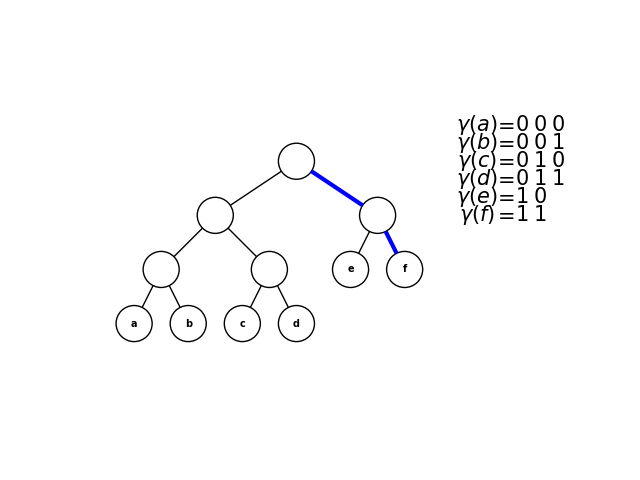

In [49]:
%run huffman_ejem1.ipynb

<p> 
    Con esto podemos reducir el problema a encontrar un árbol tal que el código asociado a este sea óptimo. Para el diseño del algoritmo pensemos en la estructura de el árbol que corresponde a un código óptimo y llamemos a este $T^{*}$. Algunas propiedades de este serán enunciadas e ilustradas a continuación. La demostración de estas se puede consultar en la bibliografía. 
</p>  

<ul> 
<li> 
<p>
    El árbol $T^{*}$ es un árbol binario completo. 
    </p> 
<p> 
Un árbol binario completo es aquel para el cual todos los nodos que no son hojas tienen exactamente dos hijos. En la siguiente imagen podemos ver que el árbol de la derecha es un árbol completo mientras que el de la izquierda no es un árbol completo. El nodo en rojo no es hoja y solo tiene un hijo.  
</p>
     <img src="propiedad1.png" width="800" height="800">
    </li> 
    
<li> 
<p> 
    Supongamos que $u$ y $v$ son hojas en $T^*$, tales que $altura(u) < altura(v)$. Supongamos también que $T^{*}$ corrsponde a un código prefijo óptimo y que la hoja $u$ está marcada con $y$ y la hoja $v$ está marcada con $z\in S$. Entonces $f_y \geq f_z$ 
    </p> 
    <p> 
    En la siguiente imagen, la letra $y$ que marca la hoja en azul tiene una profundidad menor en $T^{*}$ que la letra $z$, en rojo. Por lo tanto, en el texto, la letra $y$ tiene tiene una frecuencia mayor que la letra $z$. 
</p> 
    <img src="propiedad2.png"  width="400" height="400">
    </li>
<li> <p> 
    Existe un código prefijo óptimo con un árbol correspondiente $T^{*}$ en el cual las dos letras con menor frecuencia son asignadas a hojas que son hermanos en $T^{*}$. 
    </p>
     <p> 
         La imagen siguiente muestra la propiedad. Ya que $a$ y $b$ marcan a las hojas más profundas entonces $f_a,f_b \leq f_x$ para toda $x \in S$. 
    </p> 
     <img src="propiedad3.png"  width="400" height="400">
    </li> 
</ul> 

## Algoritmo 
<p> 
El algoritmo resolverá el problema  tomando de forma voráz los dos nodos marcados con las letras de menor frecuencia, sustituyendolos por uno nuevo reduciendo el tamaño de la instancia y resolviendo recursivamente para esta instancia más pequeña. El algoritmo es el siguiente: 
</p> 
<div style="background-color:rgba(0, 0, 0, 0.0470588); padding:10px 0;font-family:monospace;">
    <b> construir un código prefijo para el alfabeto S con las frecuencias dadas </b> <br> 
&nbsp; if S tiene dos letras then<br>
&nbsp;&nbsp; codificar una letra usando 0 y otra letra usando 1<br> 
&nbsp; else <br> 
&nbsp; &nbsp; Sea $x$ y $z$ las dos letras con menores frecuencias <br> 
&nbsp; &nbsp; Forma el alfabeto $S'$ eliminando $x$ y $z$ y reemplazando estas dos letras <br> 
&nbsp; &nbsp; por una nueva letra $w$ cuya frecuencia es $f_x + f_y$ <br> 
&nbsp; &nbsp; Construye recursivamente el código prefijo $\gamma'$ para $S'$ con árbol $T'$ <br> 
&nbsp; &nbsp; Define el código prefijo para S como sigue: <br> 
&nbsp; &nbsp; &nbsp; Comienza con $T'$. <br> 
&nbsp; &nbsp; &nbsp; Toma la hoja marcada con $w$ y añade dos hijos debajo de esta marcados con $y$ y $z$.  <br>  
</div>

Nos referimos al algoritmo anterior como el algoritmo de Huffman y el código prefijo que produce es llamado código Huffman. 
Es claro que el algoritmo siempre termina, esto debido a que en cada iteración del algoritmo el tamaño del alfabeto reduce en 1. El interactivo a continuación ilustra el algoritmo paso por paso. 

Output()

<IPython.core.display.Javascript object>


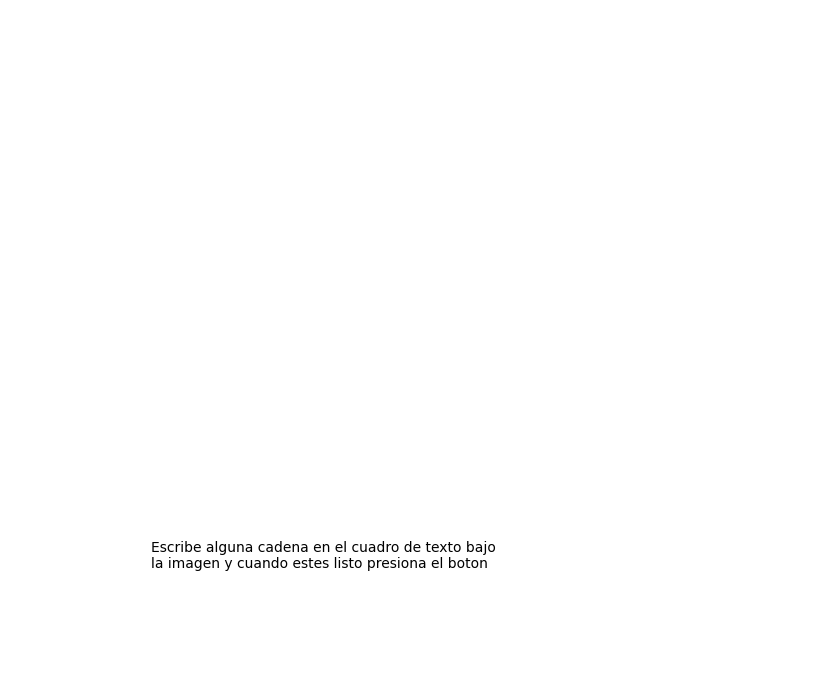

In [52]:
%run huffman_alg.ipynb

## Análisis del algoritmo
<p> 
Primero tenemos que probar la optimalidad del algoritmo. Dado que el algoritmo opera recursivamente, tenemos que probar por inducción. Así pues, es claro que es optimo para un alfabeto con dos letras. Supongamos que es óptimo para todos los alfabetos con $k-1$ letras, y consideremos una instancia de un alfabeto con $k$ letras. 
</p> 
<p> 
El algoritmo va a tomar las dos letras con menor frecuencia y producirá un código prefijo óptimo para un alfabeto $S'$ con $k$ letras representado por el árbol $T'$. La clave de la demostración es la siguiente relación  entre $ABL(T')$ y $ABL(T)$: 
</p> 
<p> 
$$ ABL(T') = ABL(T) - f_w$$
</p> 
<p> 
La altura de $y$ y $z$ son las mismas en $T$ y en $T'$. También las alturas de $y$ y $z$ son mayores que la altura de $w$  (el padre que construimos) en $T'$. Usando esto y el hecho de que $f_w = f_y + f_z$ tenemos que 
\begin{equation}
\begin{split}
     ABL(T) & = \sum_{x\in S} f_x \cdot profundidad_{T}(x) \\   
             &= f_y \cdot profundidad_{T}(y) + f_z \cdot profundidad_T(z) + sum_{x \neq y,z}f_x\cdot profundidad_T(x) \\ 
             &= (f_y + f_z)\cdot (1 + \cdot profundidad_{T'}(w)) + sum_{x \neq y,z}f_x\cdot profundidad_T(x) \\ 
             &= f_w\cdot (1 + \cdot profundidad_{T'}(w)) + sum_{x \neq y,z}f_x\cdot profundidad_T(x) \\ 
             &= f_w + f_w\cdot profundidad_{T'}(w)) + sum_{x \neq y,z}f_x\cdot profundidad_T(x) \\ 
             &= f_w + sum_{x\in S'}f_x \cdot profundidad_{T'}(x)\\ 
             &= f_w + ABL(T') 
\end{split}
\end{equation}
</p> 
<p> 
    Con este resultado se puede probar la optimalidad facilmente. Supongamos que el árbol $T$ creado por el algoritmo voraz no es óptimo. Esto significa que hay un árbol $Z$ tal que $ABL(Z) < ABL(T)$. La contradicción la encontramos como sigue. Si eliminamos las hojas $y$ y $z$ de $Z$ y marcamos al padre como $w$, entonces tenemos un árbol $Z'$ que define un código para $S'$. Entonces aplicando la identidad anterior $ABL(Z') = ABL(Z) - f_w$ a lo que habíamos asumido $ABL(Z) < ABL(T)$,  sustrayendo de ambas partes tenemos que $ABL(Z') < ABL(T')$ lo cual contradice la optimalidad de $T'$ como código prefijo para $S'$. 
</p> 


## Implementación y tiempo de Ejecución 
<p> 
    El algoritmo de Huffman se puede implementar en tiempo polinomial en función de $k$. El número de llamadas recursivas es k y en cada iteración se tienen que obtener las dos letas con menor frecuencia. Si este último proceso lo implementamos ingenuamente con un recorrido lineal el tiempo de ejecución del algoritmo será $O(k^2)$. Sin embargo, es  posible obtener estas dos letras cuya frecuencia es menor con una cola de prioridades donde la llave es la frecuencia de la letra. Esta operación tiene un costo de $O(log(k))$. Entonces, usando esta estructura de datos. La complejidad del algoritmo srá $O(k\cdot log(k))$. 
</p> 